# Lab: Regression Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 4]})

student_data.set_index('StudentID', inplace=True)

display(student_data)

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

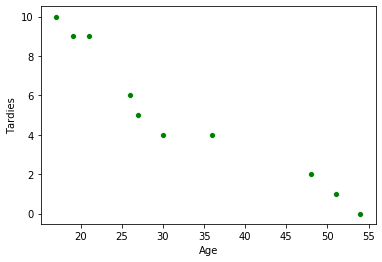

In [3]:
# Your code here.
dispersion_of_student_data = sns.scatterplot(x='Age', y='Tardies', data=student_data, color='green')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here.
print('From the graphic above, we can a decreasing regression which indicates that younger people tend to arrive \
later to class than older people')

From the graphic above, we can a decreasing regression which indicates that younger people tend to arrive later to class than older people


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
covariance = student_data['Age'].cov(student_data['Tardies'])
covariance

-45.888888888888886

In [6]:
correlation_of_variables = student_data['Age'].corr(student_data['Tardies'])
correlation_of_variables

-0.9581902363616112

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.

# Using scikit-learn:
X = student_data['Age'].values.reshape(-1,1)
y = student_data['Tardies'].values

model = LinearRegression().fit(X, y)

# This will give us the value of R²
r_sq = model.score(X, y)


intercept_1 = model.intercept_

slope_1 = model.coef_

print(f'With our linear regression model for this data, we obtained a R² of {r_sq} which means we are in a great path\
 since the relation with the mean is almost 1 which means it is almost perfect, if our R² had a negative number it\
 would mean that our model does not predict the mean very well.\n')

print(f'The intercept is: {intercept_1}\n')
print(f'The slope is: {slope_1}')

With our linear regression model for this data, we obtained a R² of 0.9181285290587203 which means we are in a great path since the relation with the mean is almost 1 which means it is almost perfect, if our R² had a negative number it would mean that our model does not predict the mean very well.

The intercept is: 13.045295754633194

The slope is: [-0.24453786]


In [8]:
# Using scipy:
Xx = student_data['Age']
Yy = student_data['Tardies']

slope, intercept, r_value, p_value, std_err = stats.linregress(Xx, Yy)

print(f'The intercept is: {intercept}\n')

print(f'The slope is: {slope}\n')

print(f'The coefficient of determination is: {r_value**2}')

The intercept is: 13.045295754633194

The slope is: -0.24453786488246793

The coefficient of determination is: 0.9181285290587204


Plot your regression model on your scatter plot.

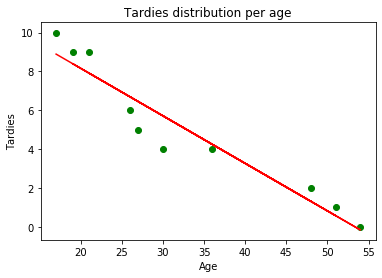

In [9]:
# Your code here.
plt.scatter(X, y, color='green')
plt.plot(X, model.predict(X), color='red')
plt.title('Tardies distribution per age')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your response here. 

corr_year_co2 = vehicles['Year'].corr(vehicles['CO2 Emission Grams/Mile'])
corr_cylinders_co2 = vehicles['Cylinders'].corr(vehicles['CO2 Emission Grams/Mile'])
corr_fuelbarrels_co2 = vehicles['Fuel Barrels/Year'].corr(vehicles['CO2 Emission Grams/Mile'])
corr_combinedmpg_co2 = vehicles['Combined MPG'].corr(vehicles['CO2 Emission Grams/Mile'])
corr_fuelcost_co2 = vehicles['Fuel Cost/Year'].corr(vehicles['CO2 Emission Grams/Mile'])

print(f'The correlation between Year and CO2 Emission Grams/Mile is {corr_year_co2}\n')
print(f'The correlation between Cylinders and CO2 Emission Grams/Mile is {corr_cylinders_co2}\n')
print(f'The correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile is {corr_fuelbarrels_co2}\n')
print(f'The correlation between Combined MPG and CO2 Emission Grams/Mile is {corr_combinedmpg_co2}\n')
print(f'The correlation between Fuel Cost/Year and CO2 Emission Grams/Mile is {corr_fuelcost_co2}')

The correlation between Year and CO2 Emission Grams/Mile is -0.22229960295054238

The correlation between Cylinders and CO2 Emission Grams/Mile is 0.7523925537297486

The correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile is 0.9861886621428727

The correlation between Combined MPG and CO2 Emission Grams/Mile is -0.9262290389336443

The correlation between Fuel Cost/Year and CO2 Emission Grams/Mile is 0.9308651512201844


In [13]:
print(f'Based on the correlations above, we can say that Fuel Barrels per year is the most important variable in \
determining CO2 emissions, because their correlation is almost 1 (correlation = {corr_fuelbarrels_co2}). \n\nOn the other \
hand, we also can say that Combined MPG is the factor which has less impact on CO2 emissions because it is the variable \
which has the less value of correlation (correlation = {corr_combinedmpg_co2})')

Based on the correlations above, we can say that Fuel Barrels per year is the most important variable in determining CO2 emissions, because their correlation is almost 1 (correlation = 0.9861886621428727). 

On the other hand, we also can say that Combined MPG is the factor which has less impact on CO2 emissions because it is the variable which has the less value of correlation (correlation = -0.9262290389336443)


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
X_fuel_barrels = vehicles['Fuel Barrels/Year'].values.reshape(-1,1)
y_co2 = vehicles['CO2 Emission Grams/Mile'].values

model = LinearRegression().fit(X_fuel_barrels, y_co2)

# This will give us the value of R²
r_sq_cylinders = model.score(X_fuel_barrels, y_co2)


intercept_cylinders = model.intercept_

slope_cylinders = model.coef_

In [15]:
# Here I'm using a linear regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [16]:
# Your response here.
print(f'The coefficient of determination is {r_sq_cylinders}\n')
print(f'The intercept is: {intercept_cylinders}\n')
print(f'The slope is: {slope_cylinders}')

The coefficient of determination is 0.9725680773391494

The intercept is: 12.486520830760526

The slope is: [26.2836254]


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
# Your code here. 
parties = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14],
                       'Y': [1, 2, 4, 4, 5, 7, 8, 13]})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [18]:
X_invited = parties['X'].values.reshape(-1,1)
y_went_party = parties['Y'].values

model = LinearRegression().fit(X_invited, y_went_party)

# This will give us the value of R²
r_sq_party = model.score(X_invited, y_went_party)

intercept_party = model.intercept_

slope_party = model.coef_

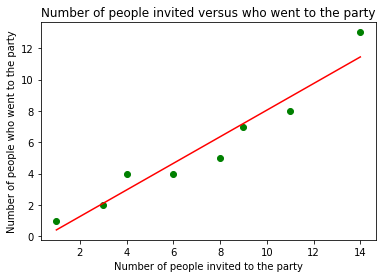

In [19]:
# Your code here.
plt.scatter(parties['X'], parties['Y'], color='green')
plt.plot(X_invited, model.predict(X_invited), color='red')
plt.xlabel('Number of people invited to the party')
plt.ylabel('Number of people who went to the party')
plt.title('Number of people invited versus who went to the party')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [20]:
print(f'On the graphic above we see an almost linear correlation between the people invited and the people who \
actually go to the party and analysing the regression results we got a coefficient of determination of {r_sq_party}, \
which means that our model of regression is good, because it is almost 1.')

On the graphic above we see an almost linear correlation between the people invited and the people who actually go to the party and analysing the regression results we got a coefficient of determination of 0.9316696375519905, which means that our model of regression is good, because it is almost 1.


In [21]:
# Your response here.
print(f'The coefficient of determination is {r_sq_party}\n')
print(f'The intercept is: {intercept_party}\n')
print(f'The slope is: {slope_party}')

The coefficient of determination is 0.9316696375519905

The intercept is: -0.43939393939393945

The slope is: [0.84848485]


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [22]:
# Your response here. 
# Yes, the last row of our party dataframe is an outlier, cause it is really far from our regression line

parties.drop(index=7, inplace=True)
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [23]:
# New model of linear regression without the outlier

X_invited_without_outlier = parties['X'].values.reshape(-1,1)
y_went_party_without_outlier = parties['Y'].values

model = LinearRegression().fit(X_invited_without_outlier, y_went_party_without_outlier)

# This will give us the value of R²
r_sq_party_without_outlier = model.score(X_invited_without_outlier, y_went_party_without_outlier)

intercept_party_without_outlier = model.intercept_

slope_party_without_outlier = model.coef_

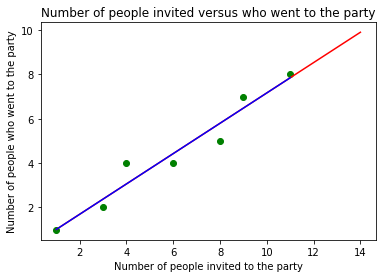

In [24]:
# New graphic representing our data, with the two regression lines (from the new model and the model with the outlier)

plt.scatter(parties['X'], parties['Y'], color='green')
plt.plot(X_invited, model.predict(X_invited), color='red')
plt.plot(X_invited_without_outlier, model.predict(X_invited_without_outlier), color='blue')
plt.xlabel('Number of people invited to the party')
plt.ylabel('Number of people who went to the party')
plt.title('Number of people invited versus who went to the party')
plt.show()

In [25]:
print(f'The coefficient of determination is {r_sq_party_without_outlier}\n')
print(f'The intercept is: {intercept_party_without_outlier}\n')
print(f'The slope is: {slope_party_without_outlier}')

The coefficient of determination is 0.9433811802232853

The intercept is: 0.32330827067669077

The slope is: [0.68421053]


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here. 
# Since the graphics represent the results of our models, we can see that without the outlier our points are closer
# to the mean which will give us a R² value closer to 1 because our model has more precision.

# Another change seen was the intercept point, one the first model we had a negative value and without the outlier
# we got a positive value of 0.33 aproximately which means ......................

# Finally, the slope value also changed, is lower in the second model which means it's more accentuated than with the outlier